In [1]:
# moving average plot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data 
data = pd.read_csv("Train.csv")
data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [5]:
data.Date

0          1/1/19
1          1/1/19
2          1/1/19
3          1/1/19
4          1/1/19
           ...   
86579    31-12-21
86580    31-12-21
86581    31-12-21
86582    31-12-21
86583    31-12-21
Name: Date, Length: 86584, dtype: object

In [6]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_24556/3916194540.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


In [10]:
data.Date

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
86579   2021-12-31
86580   2021-12-31
86581   2021-12-31
86582   2021-12-31
86583   2021-12-31
Name: Date, Length: 86584, dtype: datetime64[ns]

In [11]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['GT_NO2'].rolling(window=window_size).mean()

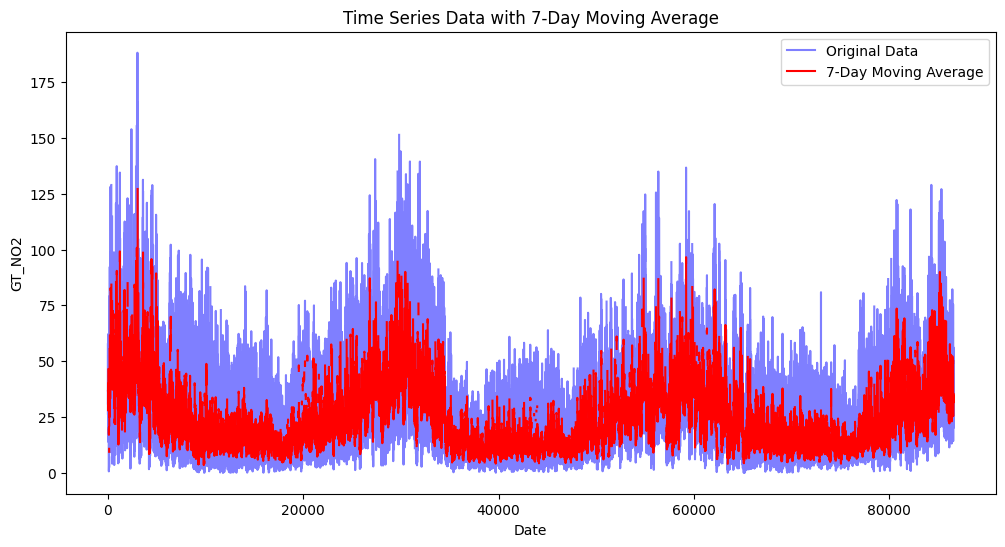

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GT_NO2'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('GT_NO2')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [14]:
window_size = 14
data['Moving_Avg'] = data['GT_NO2'].rolling(window=window_size).mean()

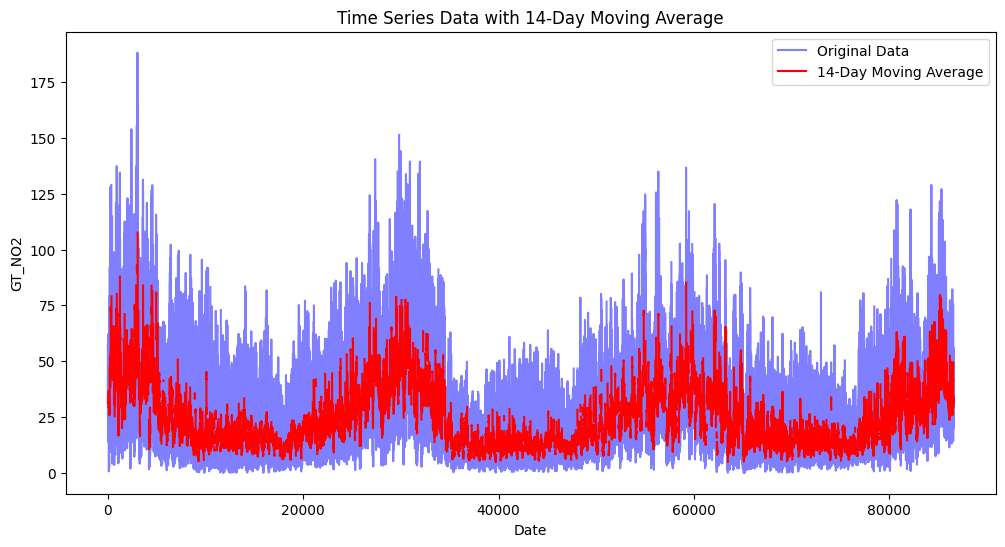

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GT_NO2'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('GT_NO2')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [16]:
window_size = 30
data['Moving_Avg'] = data['GT_NO2'].rolling(window=window_size).mean()

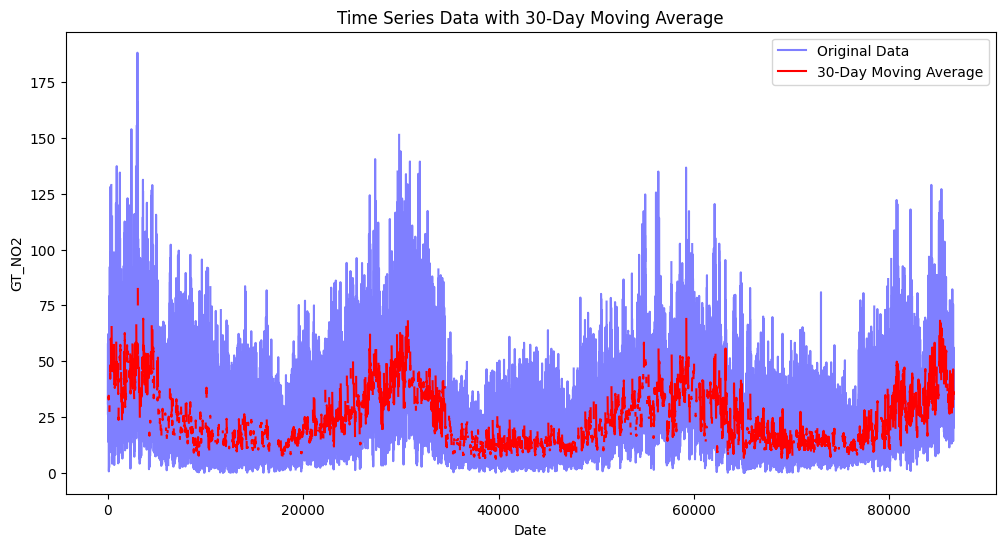

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GT_NO2'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('GT_NO2')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [18]:
# seasonal trend is present in the data 
# cyclic pattern also present

## Other Features

In [19]:
data = data.replace([np.inf, -np.inf], np.nan)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_24556/432956710.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_24556/432956710.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [20]:
data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Moving_Avg
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,278.38,0.230527,0.559117,0.000024,0.000117,0.000084,14440.82126,31.0,33.549167
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,278.38,-0.074006,0.869309,0.000024,0.000127,0.000084,14441.79815,42.0,33.549167
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,278.38,0.024470,0.674160,0.000024,0.000086,0.000084,14437.38294,31.0,33.549167
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,278.38,-0.010442,0.920054,0.000024,0.000124,0.000084,14440.83831,30.0,33.549167
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,278.38,-0.176178,0.747464,0.000024,0.000116,0.000084,14438.79037,58.0,33.549167


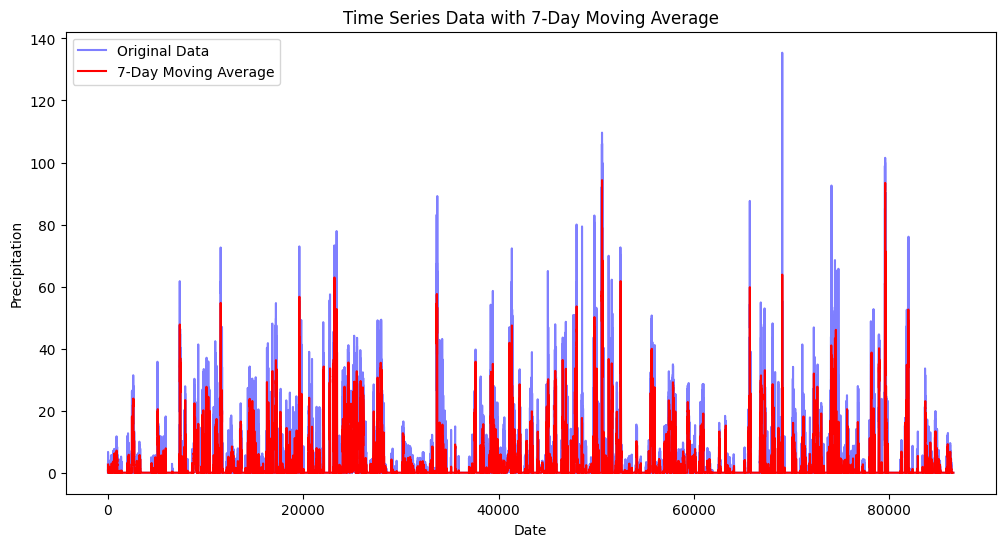

In [22]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['Precipitation'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Precipitation'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [23]:
# exploring the correlation between NO₂ and precipitation over short timeframes
# precipitation graph does not show clear seasonal cycles or periodicity

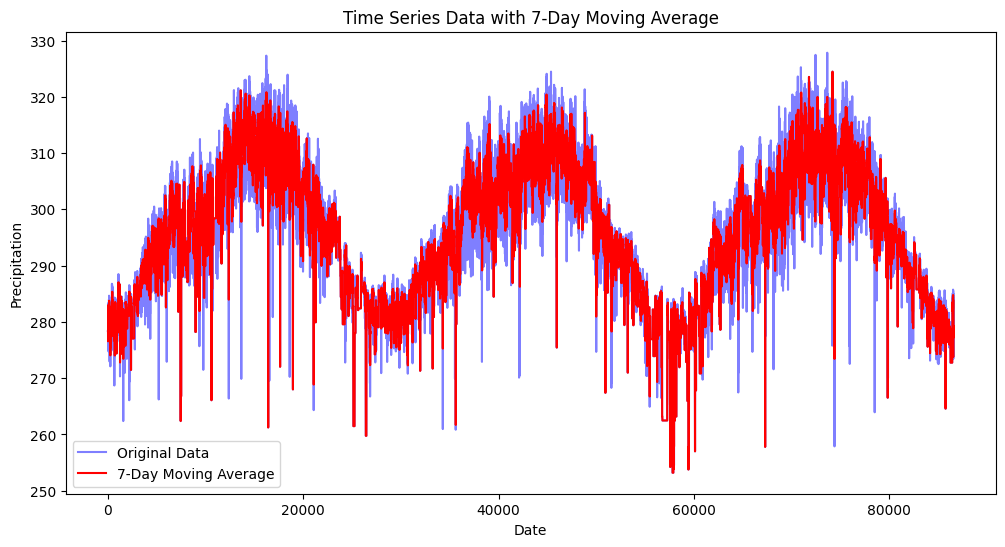

In [24]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['LST'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['LST'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('LST')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [25]:
# seasonality pattern 
# long term trend
# lagged values of temperature to capture any delayed effects on NO₂.

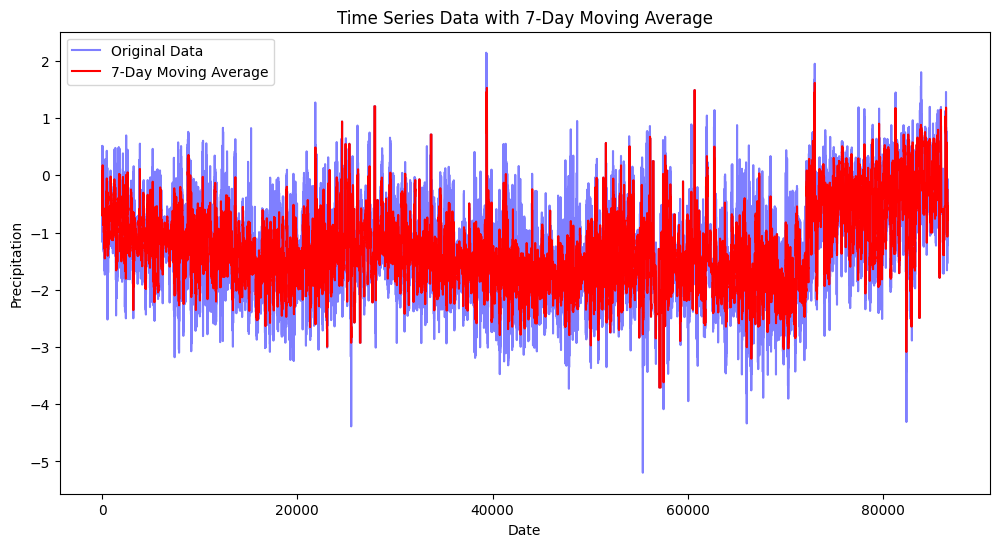

In [26]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['AAI'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AAI'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [27]:
# short term events
# no seasonality 
# event based predictor 
# should I combine precipitation and AAI?
# -- Sum/Avg
# -- Multiplicative Indicator 
# -- Lagged Interaction Term
# -- Threshold Based 
# -- Rolling Window aggregate 
# -- Then Apply PCA

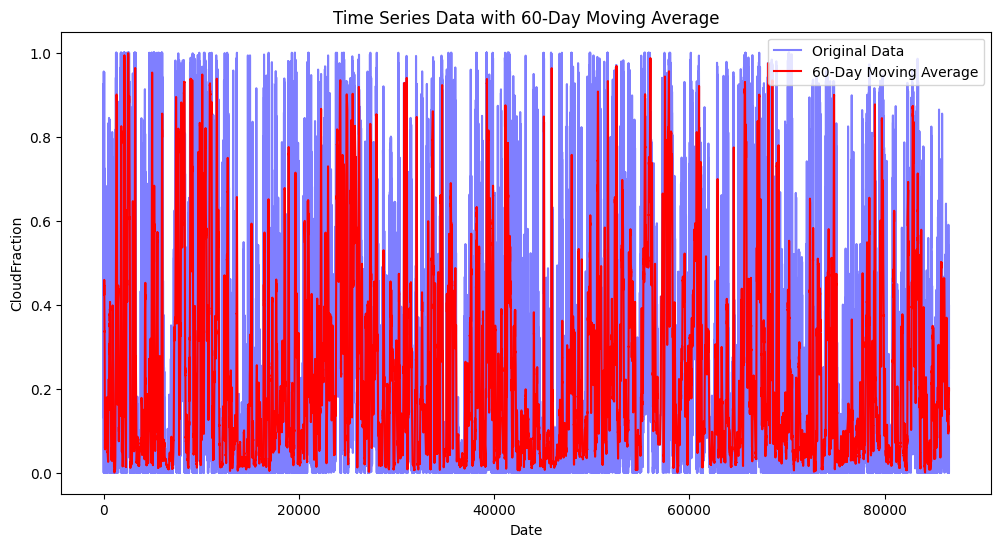

In [31]:
# calculate average 
window_size = 60
data['Moving_Avg'] = data['CloudFraction'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CloudFraction'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('CloudFraction')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [32]:
# very light seasonality -- that too for 60 window size 

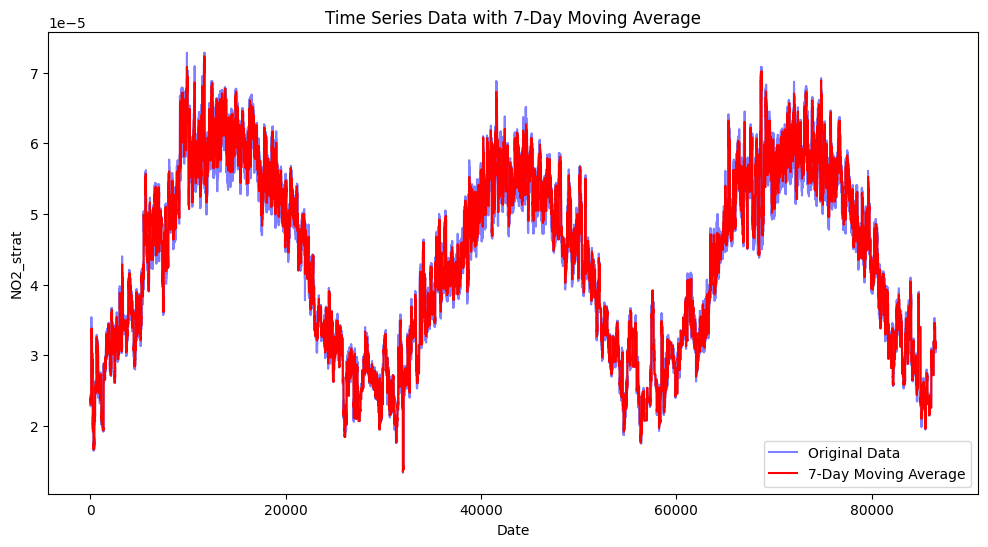

In [34]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['NO2_strat'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['NO2_strat'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('NO2_strat')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [35]:
# strong seasonality 

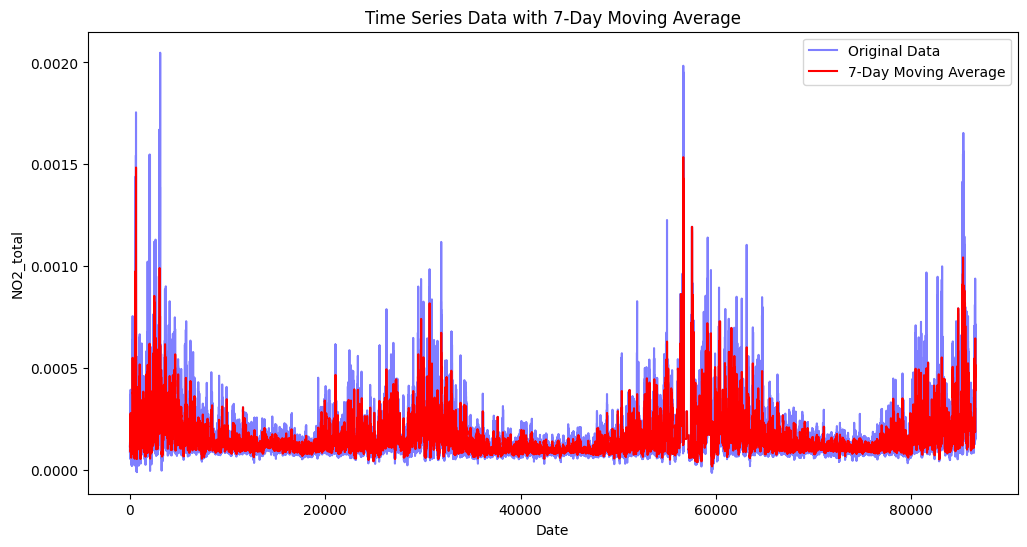

In [36]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['NO2_total'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['NO2_total'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('NO2_total')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

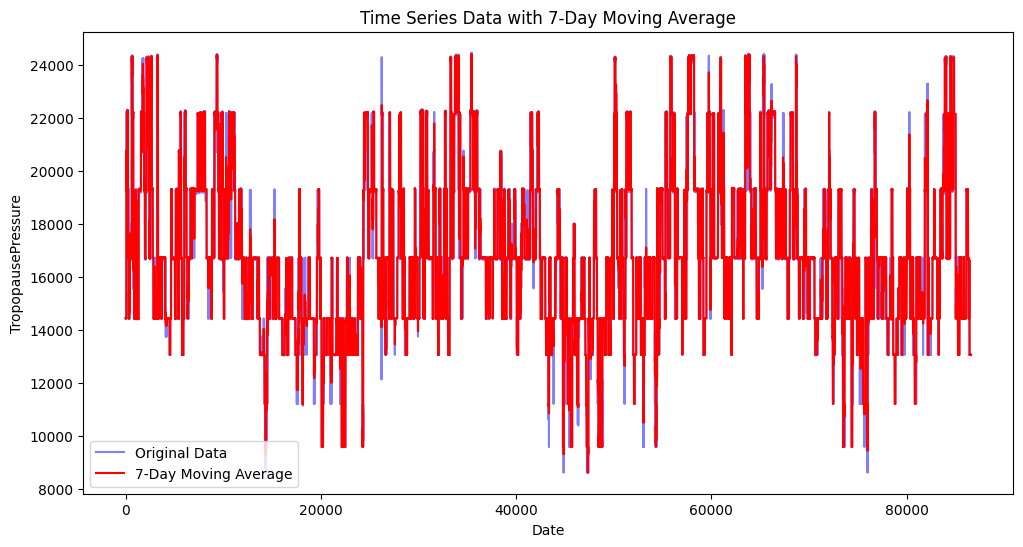

In [37]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['TropopausePressure'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TropopausePressure'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('TropopausePressure')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

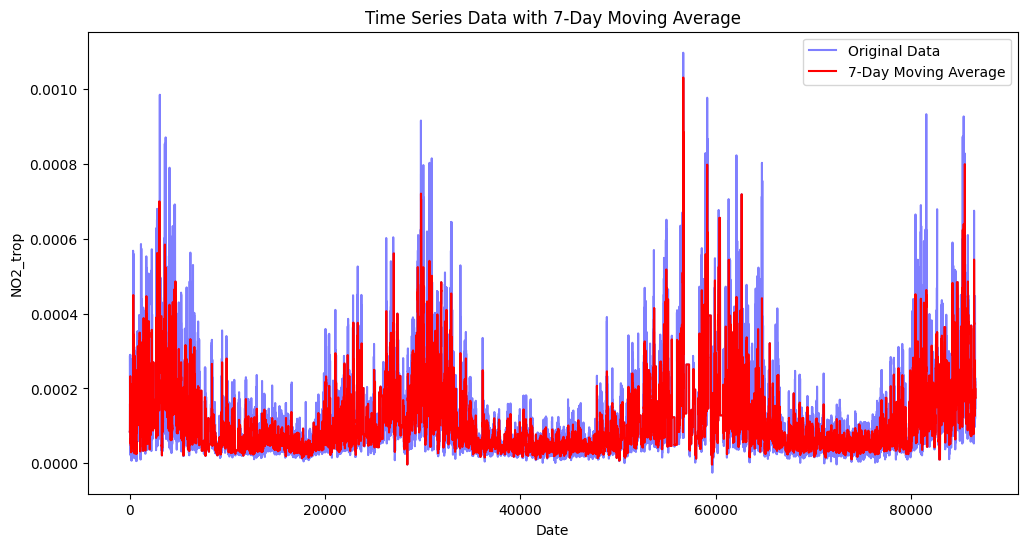

In [38]:
# calculate average 
window_size = 7
data['Moving_Avg'] = data['NO2_trop'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['NO2_trop'], label='Original Data', color='blue', alpha=0.5)
plt.plot(data.index, data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('NO2_trop')
plt.title(f'Time Series Data with {window_size}-Day Moving Average')
plt.legend()
plt.show()

In [39]:
# # strong seasonality / cycle 
# LST
# NO2_strat
# Pressure
# Cloud Fraction - very light

# # no seasonality 
# Precipitation
# AAI
# NO2_total

In [40]:
# # time series feature - 
# Month and Date
# Sin / Cosine transformation of time / feature 
# Lagged Feature 
# Rolling Mean / Rolling Standard Deviation
# Combining Seasonality and Trend

# # Feature that work better with XGBoost 
# # avg NO2 per month 
# # seasonl decomposition - Seasonal and Trend decomposition using LOESS
# # Fourier terms (e.g., Fourier sine and cosine transformations


In [41]:
# Drawback moving avg 
# https://www.investopedia.com/terms/m/movingaveragechart.asp#:~:text=A%20moving%20average%20(MA)%20chart,data%20for%20each%20time%20period.